In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randn
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [124]:
from numpy.random import randn
import seaborn as sns
import matplotlib as mpl
from tabulate import tabulate
import six
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from nltk.corpus import stopwords
import string

In [127]:
plt.style.use('seaborn')
plt.rcParams["patch.force_edgecolor"] = True

In [128]:
demo_df = pd.read_csv('data/demo_df.csv')
demo_df

,Band,Lyrics,Song,Test_Artist
0,Bob Dylan,"Go 'way from my window,\r\nLeave at your own c...",It Ain't Me Babe,1
1,Rick Astley,We're no strangers to love\r\nYou know the rul...,Never Gonna Give You Up,0


In [129]:
demo_df2 = demo_df.copy()

In [130]:
demo_df2['Lyrics'] = 1

In [131]:
print(tabulate(demo_df2, headers=demo_df.columns, tablefmt='pipe', showindex=False))

| Band        |   Lyrics | Song                    |   Test_Artist |
|:------------|---------:|:------------------------|--------------:|
| Bob Dylan   |        1 | It Ain't Me Babe        |             1 |
| Rick Astley |        1 | Never Gonna Give You Up |             0 |


In [132]:
def render_mpl_df_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values,  bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    
    return ax

<Figure size 576x396 with 0 Axes>

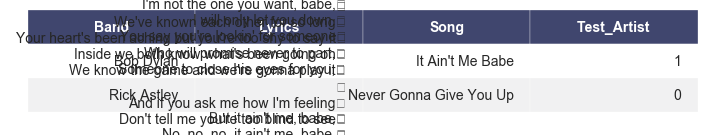

In [133]:
fig = plt.figure()
test = render_mpl_df_table(demo_df)
# plt.ihow(aspect='auto')
# plt.savefig('demo_df.png');

In [134]:
print(demo_df['Lyrics'][1])

We're no strangers to love
You know the rules and so do I
A full commitment's what I'm thinking of
You wouldn't get this from any other guy

I just want to tell you how I'm feeling
Gotta make you understand

[Chorus]
Never gonna give you up, never gonna let you down
Never gonna run around and desert you
Never gonna make you cry, never gonna say goodbye
Never gonna tell a lie and hurt you

We've known each other for so long
Your heart's been aching but you're too shy to say it
Inside we both know what's been going on
We know the game and we're gonna play it

And if you ask me how I'm feeling
Don't tell me you're too blind to see

[Chorus: Repeat x2]

(Ooh give you up)
(Ooh give you up)
(Ooh) never gonna give, never gonna give (give you up)
(Ooh) never gonna give, never gonna give (give you up)

We've known each other for so long
Your heart's been aching but you're too shy to say it
Inside we both know what's been going on
We know the game and we're gonna play it

I just want to tell you

In [135]:
additional_s_words = ["aren't", "can't", "couldn't", 'did', "didn't", 'does', "doesn't", 'doing', "don't", "hadn't",
                      "hasn't", "haven't", 'having', "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm",
                      "i've", "isn't", "it's", "let's", "mustn't", 'ought', 'ours', 'ourselves', "shan't", "she'd",
                      "she'll", "she's", "shouldn't", "that's", 'theirs', "there's", "they'd", "they'll", "they're",
                      "they've", "wasn't", "we'd", "we'll", "we're", "we've", "weren't", "what's", "when's", "where's",
                      "who's", "why's", "won't", "wouldn't", "you'd", "you'll", "you're", "you've"]

In [136]:
def lyric_cleanup(lyrics):
    '''
    1. remove punctuation
    2. remove stopwords from nltk.corpus
    3. return list of clean word list from lyrics
    '''
    rm_additional = [word for word in lyrics.split() if word.lower() not in additional_s_words]
    rm_additional = ' '.join(rm_additional)
    rm_punct = [char for char in rm_additional if char not in string.punctuation]
    rm_punct = ''.join(rm_punct)
    return [word.lower() for word in rm_punct.split() if word.lower() not in stopwords.words('english')]

In [137]:
vectorizer = CountVectorizer
demo_vect = vectorizer(analyzer=lyric_cleanup).fit_transform(demo_df['Lyrics'])
demo_vect2 = vectorizer(analyzer=lyric_cleanup).fit(demo_df['Lyrics'])
demo_vect3 = demo_vect2.transform(demo_df['Lyrics'])

In [141]:
demo_columns = demo_vect2.get_feature_names()
demo_data = demo_vect.toarray()
demo_word_df = pd.DataFrame(data=demo_data, columns=demo_columns)

## Top Words chart

In [183]:
sum_words = np.asarray(demo_vect3.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'word': demo_vect2.get_feature_names(), 'count': sum_words})
demo_count = counts_df.sort_values(by='count', ascending=False).head(20).set_index('word').transpose()
demo_count = demo_count.reset_index().rename(columns={'index':''}).drop(['chorus', 'understand'], axis=1)
cols = demo_count.columns 

In [184]:
# print(tabulate(demo_count, headers=cols, tablefmt='pipe', showindex=False))
demo_count

word,,babe,never,gonna,aint,give,someone,say,know,lookin,ooh,go,want,tell,one,make,feeling,inside,going
0,count,13,12,12,9,9,7,6,5,5,4,4,4,4,3,3,3,3,2


In [185]:
demo_bow = demo_word_df[['gonna','never','babe','give', 'want']]
demo_bow.insert(0, value=['Bob Dylan', 'Rick Astley'], column='')
demo_bow.insert(1, value=[True, False], column='BD/NotBD')
cols = demo_bow.columns

In [188]:
# print(tabulate(demo_bow, headers=cols, tablefmt='pipe', showindex=False))
demo_bow

,,BD/NotBD,gonna,never,babe,give,want
0,Bob Dylan,True,0,2,13,0,2
1,Rick Astley,False,12,10,0,9,2


In [189]:
def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([-13, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values,  bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

## Top Words chart

In [190]:
# fig = plt.figure()
# test = render_mpl_table(demo_count, header_columns=1)
# plt.savefig('bow_count.png');

In [191]:
# fig = plt.figure()
# test = render_mpl_table(demo_bow, header_columns=2)
# plt.savefig('demo_bow.png');

In [192]:
# demo_vect = vectorizer(analyzer=lyric_cleanup).fit_transform(demo_df['Lyrics'])
# demo_vect2 = vectorizer(analyzer=lyric_cleanup).fit(demo_df['Lyrics'])
# demo_vect3 = demo_vect2.transform(demo_df['Lyrics'])
# demo_columns = demo_vect2.get_feature_names()
# demo_data = demo_vect.toarray()

In [193]:
tfidf_transformer = TfidfTransformer().fit(demo_vect3)
lyrics_tfidf = tfidf_transformer.transform(demo_vect3)
lyrics_features = TfidfVectorizer(analyzer=lyric_cleanup).fit(demo_df['Lyrics'])

In [194]:
tfidf_weights = TfidfTransformer().fit_transform(demo_vect3)
weights = np.asarray(tfidf_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'word': demo_vect2.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,word,weight
7,babe,0.317690
35,gonna,0.289772
1,aint,0.219940
32,give,0.217329
62,never,0.206588
80,someone,0.171064
53,lookin,0.122189
44,know,0.120738
77,say,0.103707
33,go,0.097751


In [205]:
float_formatter = lambda x: f"{x:.4f}"
np.set_printoptions(formatter={'float_kind':float_formatter})
weighted_demo_data = lyrics_tfidf.toarray()
weighted_demo_cols = lyrics_features.get_feature_names()
pd.options.display.float_format = '{0:.2%}'.format
weighted_demo_word_df = pd.DataFrame(data=weighted_demo_data, columns=weighted_demo_cols)
demo_tfidf = weighted_demo_word_df[['gonna','never','babe','give', 'want']]
demo_tfidf.insert(0, value=['Bob Dylan', 'Rick Astley'], column='')
demo_tfidf.insert(1, value=['True', 'False'], column='BD/NotBD')

In [212]:
# print(tabulate(demo_tfidf, headers=cols, tablefmt='pipe', showindex=False, floatfmt='%'))
demo_tfidf

,,BD/NotBD,gonna,never,babe,give,want
0,Bob Dylan,True,0.00%,6.96%,63.54%,0.00%,6.96%
1,Rick Astley,False,57.95%,34.36%,0.00%,43.47%,6.87%


In [46]:
def render_mpl_table_percent(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([-2, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    fmt = data.values    
    fmt2 = []
    for i in fmt:
        for j in i:
            if isinstance(j, str) or isinstance(j, bool):
                fmt2.append(j)
            else:
                fmt2.append('{0:.2%}'.format(j))
            
    
#     fmt2 = [['{0:.2%}'.format(j) for j in i] for i in fmt]
    
    mpl_table = ax.table(cellText=np.array([fmt2]).reshape(2,7), bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

In [47]:
# fig = plt.figure()
# render_mpl_table_percent(demo_tfidf, header_columns=2)
# plt.savefig('demo_tfidf.png');